In [130]:
import numpy as np
import pandas as pd
from random import randrange
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt

header = ['age','workclass','fnlwgt','education','education_num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
train_df = pd.read_csv('Downloads/adult.data', names = header)
test_df = pd.read_csv('Downloads/adult.test', comment = '|', names = header) #Comment = '|' to ignore first line

In [7]:
adult = pd.concat([test_df, train_df])

In [8]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 32560
Data columns (total 15 columns):
age               48842 non-null int64
workclass         48842 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education_num     48842 non-null int64
marital-status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital-gain      48842 non-null int64
capital-loss      48842 non-null int64
hours-per-week    48842 non-null int64
native-country    48842 non-null object
income            48842 non-null object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [9]:
adult.describe()

,age,fnlwgt,education_num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
#Check if there is missing values 
adult.isnull().sum() #no NaN 

for i,j in zip(adult.columns,(adult.values.astype(str) == ' ?').sum(axis = 0)):
    if j > 0:
        print(str(i) + ': ' + str(j) + ' missing')    

workclass: 2799 missing
occupation: 2809 missing
native-country: 857 missing


In [11]:
all_data = [train_df, test_df]

In [12]:
#Dropping the missing values
for data in all_data:
    for i in data.columns:
        data[i].replace(' ?', np.nan, inplace=True)
    data.dropna(inplace=True)

## Exploratory Analysis
Compute basic statistics on the data to understand it better. E.g., what are the distributions of the positive vs.
negative classes, what are the distributions of some of the numerical features? what are the correlations between
the features? how does the scatter plots of pair-wise features look-like for some subset of features?

In [13]:
# Reformat income column
adult['income']=adult['income'].map({' <=50K': 0, ' >50K': 1, ' <=50K.': 0, ' >50K.': 1}) 

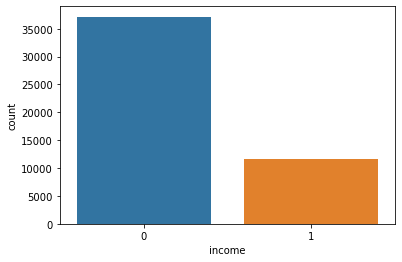

In [14]:
# Count of >50K & <=50K
sns.countplot(adult['income'],label="Count")

## Data Preparation

In [68]:
train_df['income'] = train_df['income'].map({' <=50K': 0, ' >50K': 1})
test_df['income'] = test_df['income'].map({' <=50K.': 0, ' >50K.': 1}) 

One-hot encode categorical variables (columns 1,3,5,6,7,8,9,13).

In [70]:
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder='passthrough')
onehotencoder = OneHotEncoder()
train_adult = columnTransformer.fit_transform(train_df).toarray()
test_adult = columnTransformer.fit_transform(test_df).toarray()